# Mobility Matrix for Econ subset (2005~2009)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
local = '/Users/josephlee/Downloads/00_data_econ_05_09.csv'
data = pd.read_csv(local)
data = data.dropna(subset=['Class Year']) 

In [3]:
# set Class Year Number as students' class year
data['Class Year Number'] = 0
data.loc[data['Class Year'] == 'First Year Fall Term', 'Class Year Number'] = 1
data.loc[data['Class Year'] == 'First Year Spring Term', 'Class Year Number'] = 1
data.loc[data['Class Year'] == 'Second Year Fall Term', 'Class Year Number'] = 2
data.loc[data['Class Year'] == 'Second Year Spring Term', 'Class Year Number'] = 2
data.loc[data['Class Year'] == 'Third Year Fall Term', 'Class Year Number'] = 3
data.loc[data['Class Year'] == 'Third Year Spring Term', 'Class Year Number'] = 3
data.loc[data['Class Year'] == 'Fourth Year Fall Term', 'Class Year Number'] = 4
data.loc[data['Class Year'] == 'Fourth Year Spring Term', 'Class Year Number'] = 4

In [4]:
data.head()

,Calculation ID,Subject,Catalog,Descr,Grade,Term Descr,Major 1,Major 2,Minor 1,Minor 2,...,Secondary 2,Secondary 3,Secondary 4,Grad Year,Enrollment Start,Term Year,Semester Term,Class Year,Number Grade,Class Year Number
0,2760.65,LINGUIST,103,SYMBOLIC LOGIC,A,2009 Spring Term,Economics (BS),NaN,NaN,NaN,...,NaN,NaN,NaN,2009.0,2005.0,2009.0,Spring Term,Fourth Year Spring Term,4.0,4
1,2760.65,SPANISH,107,ADVANCED GRAMMAR,A,2007 Fall Term,Economics (BS),NaN,NaN,NaN,...,NaN,NaN,NaN,2009.0,2005.0,2007.0,Fall Term,Third Year Fall Term,4.0,3
2,2760.65,MATH,107,LINEAR ALGEBRA & DIFF EQUATION,B+,2005 Fall Term,Economics (BS),NaN,NaN,NaN,...,NaN,NaN,NaN,2009.0,2005.0,2005.0,Fall Term,First Year Fall Term,3.3,1
3,2760.65,WRITING,20,ACADEMIC WRITING,A,2005 Fall Term,Economics (BS),NaN,NaN,NaN,...,NaN,NaN,NaN,2009.0,2005.0,2005.0,Fall Term,First Year Fall Term,4.0,1
4,2760.65,CHEM,23L,ACCEL GENERAL CHEMISTRY,A,2006 Fall Term,Economics (BS),NaN,NaN,NaN,...,NaN,NaN,NaN,2009.0,2005.0,2006.0,Fall Term,Second Year Fall Term,4.0,2


In [5]:
data = data.rename(columns={"Calculation ID": "ID"})
# save class years separately 
data_1 = data[data['Class Year Number'] == 1]
# data_11 = data[data['Class Year'] == 'Third Year Fall Term', 'Class Year Number']
# data_12 = data[data['Class Year'] == 'Third Year Fall Term', 'Class Year Number']
data_2 = data[data['Class Year Number'] == 2]
data_3 = data[data['Class Year Number'] == 3]
data_4 = data[data['Class Year Number'] == 4]

# df_1 = data_1.groupby('Descr').filter(lambda x : len(x)>5)
# df_2 = data_2.groupby('Descr').filter(lambda x : len(x)>5)

In [6]:
# print(len(data_1),len(df_1))

In [7]:
# print(len(data_2),len(df_2))

# create matrix for every courses

In [8]:
# create sparse matrix by each student
ohe1_ = pd.get_dummies(data_1.Descr).groupby(data_1.ID).sum().reset_index()
ohe2_ = pd.get_dummies(data_2.Descr).groupby(data_2.ID).sum().reset_index()
ohe3_ = pd.get_dummies(data_3.Descr).groupby(data_3.ID).sum().reset_index()
ohe4_ = pd.get_dummies(data_4.Descr).groupby(data_4.ID).sum().reset_index()


In [9]:
# Mobility matrix are supposed to have the same number of students from one year to the next year

set2 = set(ohe2_['ID'].values)
set3 = set(ohe3_['ID'].values)
set_difference = set2-set3
set_difference

{16136.7}

In [10]:
# the number of students from 2nd year and 3rd year should be the same
data_2f = data_2[data_2['ID'] != 16136.7]
data_4f = data_4[data_4['ID'] != 16136.7]


In [11]:
ohe2f_ = pd.get_dummies(data_2f.Descr).groupby(data_2f.ID).sum().reset_index()
ohe4f_ = pd.get_dummies(data_4f.Descr).groupby(data_4f.ID).sum().reset_index()

In [12]:
print(len(ohe1_), len(ohe2_), len(ohe2f_), len(ohe3_), len(ohe4_),len(ohe4f_))

159 159 158 158 159 158


In [13]:
# get all courses name from each year
row_t1 = data_1['Descr'].value_counts().index
row_t2 = data_2['Descr'].value_counts().index
row_t3 = data_3['Descr'].value_counts().index
row_t4 = data_4['Descr'].value_counts().index

In [14]:
row_t1

Index(['ACADEMIC WRITING', 'ECONOMIC PRINCIPLES', 'INTERMEDIATE CALCULUS',
       'INTERMEDIATE ECONOMICS I', 'FIRST-YEAR SEMINAR (TOP)',
       'GENERAL CHEMISTRY', 'PROBABILITY/STAT INFER',
       'INTERMEDIATE ECONOMICS II', 'ONE VARIABLE CALCULUS',
       'LABORATORY CALCULUS II',
       ...
       'ENGINEERING INNOVATION', 'SP TOP BRITISH LIT IV',
       'WORLD RELIGIONS IN AMERICA', 'SHAKESPEARE BEFORE 1600',
       'MOZART AND HIS TIME', 'LIFE'S BEGINNINGS', 'THE ENLIGHTENMENT',
       'FOCUS SEMINAR (TOPICS)', 'INTRO TO SPANISH LIT I', 'GLOBAL CULTURE'],
      dtype='object', length=230)

In [15]:
# set students' ID as index, instead of a default number.
ohe1t_1 = ohe1_.set_index(ohe1_.columns[0])
ohe2t_1 = ohe2_.set_index(ohe1_.columns[0])
ohe2tf_1 = ohe2f_.set_index(ohe1_.columns[0])
ohe3t_1 = ohe3_.set_index(ohe1_.columns[0])
ohe4tf_1 = ohe4f_.set_index(ohe1_.columns[0])

In [16]:
ohe1t_1.head()

,20 C AMERICAN POL THEORY,ABNORMAL PSYCHOLOGY,ACADEMIC WRITING,ACCEL GENERAL CHEMISTRY,ACTING FOR THE CAMERA,ADV FR LANG/WRIT WORKSHP,ADV GERMAN I: CULTURE/SOCIETY,ADV INTERMED FR LANG/CUL,ADV INTERMEDIATE SPANISH,ADV SPANISH WRITING,...,TOPICS MODERN CHINESE,TOPICS: SPANISH LINGUISTICS,TRADITIONS IN DOC STUDIES,US LATINOS: IMMIGRATION/ADAPT,VIOLA,VISUAL RESEARCH/AMERICAN DREAM,VOICE,WORLD MILITARY HISTORY,WORLD OF THE GREEK THEATER,WORLD RELIGIONS IN AMERICA
ID,,,,,,,,,,,,,,,,,,,,,
2760.6500,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8897.8375,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11659.5875,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11683.6625,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11753.7000,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# To calculte our mobility matrix, we need to transpose the current year matrix and product the transposed current year with the next year.

# The mobility matrix from the first year to second year
transt1_2 = ohe1t_1.T.dot(ohe2t_1)
# The mobility matrix from the second year to third year
transt2_3 = ohe2tf_1.T.dot(ohe3t_1)
# The mobility matrix from the third year to fourth year
transt3_4 = ohe3t_1.T.dot(ohe4tf_1)

transt3_4.head()

,ABNORMAL PSYCHOLOGY,ACOUSTICS AND MUSIC,ADV COMP: WRITING HUMOR,ADV COMP:STYLISTIC IMITA,ADV FIN & MGRL ACCOUNTING,ADV INTERMEDIATE SPANISH,ADV RUS RDG/TRANS/SYNTAX,ADV SPANISH WRITING,ADV SPECIAL TOPICS IN MUSIC,ADV ST MUS PERFORMANCE,...,VOICE AND SPEECH,VOICE/BODY GESTURE THEATER,"WEALTH, POWER, AND INEQUALITY",WEB-BASED MULTIMEDIA COMM.,WESTERN MUSICAL INSTRUMENTS,WOMEN AND THE PROFESSIONS,"WOMEN, GENDER/SEXUALITY, US",WORLD MILITARY HISTORY,WORLD RELIGIONS IN AMERICA,WRITING: POETRY
ABNORMAL PSYCHOLOGY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ABORTION IN AMERICAN CULTURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACOUSTICS AND MUSIC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADV FIN & MGRL ACCOUNTING,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADV FR LANG/WRIT WORKSHP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# get only courses related to the current year
transt1_2_sub = transt1_2.loc[row_t1]
transt2_3_sub = transt2_3.loc[row_t2]
transt3_4_sub = transt3_4.loc[row_t3]

In [19]:
transt1_2_sub.head()

,16TH CENTURY ITALIAN ART,ABNORMAL PSYCHOLOGY,ACADEMIC WRITING,ACCEL GENERAL CHEMISTRY,ACOUSTICS AND MUSIC,ACTING REALISM,ADAPTIVE LEADERSHIP,ADV FIN & MGRL ACCOUNTING,ADV FR LANG/WRIT WORKSHP,ADV INTERMED FR LANG/CUL,...,URBAN ECONOMICS,US COMPARATIVE STATE POLITICS,VIKINGS/THEIR LITERATURE,VOCAL DIC,VOICE,WAR AND PEACE,"WAVES, BEACHES, COASTLINE DYNA",WEB-BASED MULTIMEDIA COMM.,WESTERN WARFARE SINCE 1789,WOMEN IN THE ECONOMY
ACADEMIC WRITING,2,2,0,2,2,1,1,1,1,3,...,2,1,1,1,4,1,1,1,1,2
ECONOMIC PRINCIPLES,0,0,0,1,2,0,1,0,1,2,...,2,1,0,1,4,1,1,1,1,0
INTERMEDIATE CALCULUS,2,1,1,0,1,1,1,1,0,2,...,1,1,1,0,2,1,1,1,0,1
INTERMEDIATE ECONOMICS I,2,0,0,0,0,1,0,1,1,2,...,2,0,1,0,0,1,0,0,1,2
FIRST-YEAR SEMINAR (TOP),1,1,0,1,0,0,0,1,0,0,...,1,0,0,1,2,0,0,1,0,1


In [20]:
transt1_2m = transt1_2_sub[row_t2]
transt2_3m = transt2_3_sub[row_t3]
# transt3_4m = transt3_4_sub[row_t4]

In [21]:
# To normalize each class given the current year, we get the sum of each row of the current year first.
row_sum = transt1_2m.sum(axis=1).to_frame()

In [22]:
# normalizing each class given the current year, we get a value ranging from 0 to 1

transt1_2mc = transt1_2m.div(transt1_2m.sum(axis=1), axis=0)
transt2_3mc = transt2_3m.div(transt2_3m.sum(axis=1), axis=0)
transt3_4mc = transt3_4.div(transt3_4.sum(axis=1), axis=0)

# Visualizing

In [28]:
# # Draw a plot of the mobility matrix from first year to second year (all classes)
# plt.rcParams['figure.figsize'] = (20.0, 20.0)

# sns.heatmap(transt1_2mc, annot = True)

In [29]:
# set the threshold to find significant classes transition.
ex = transt1_2mc[(transt1_2mc > 0.2).any(1)]

In [30]:
# # # Draw a plot of the mobility matrix from first year to second year (significant classes)

# plt.rcParams['figure.figsize'] = (20.0, 20.0)

# sns.heatmap(ex, annot = True)

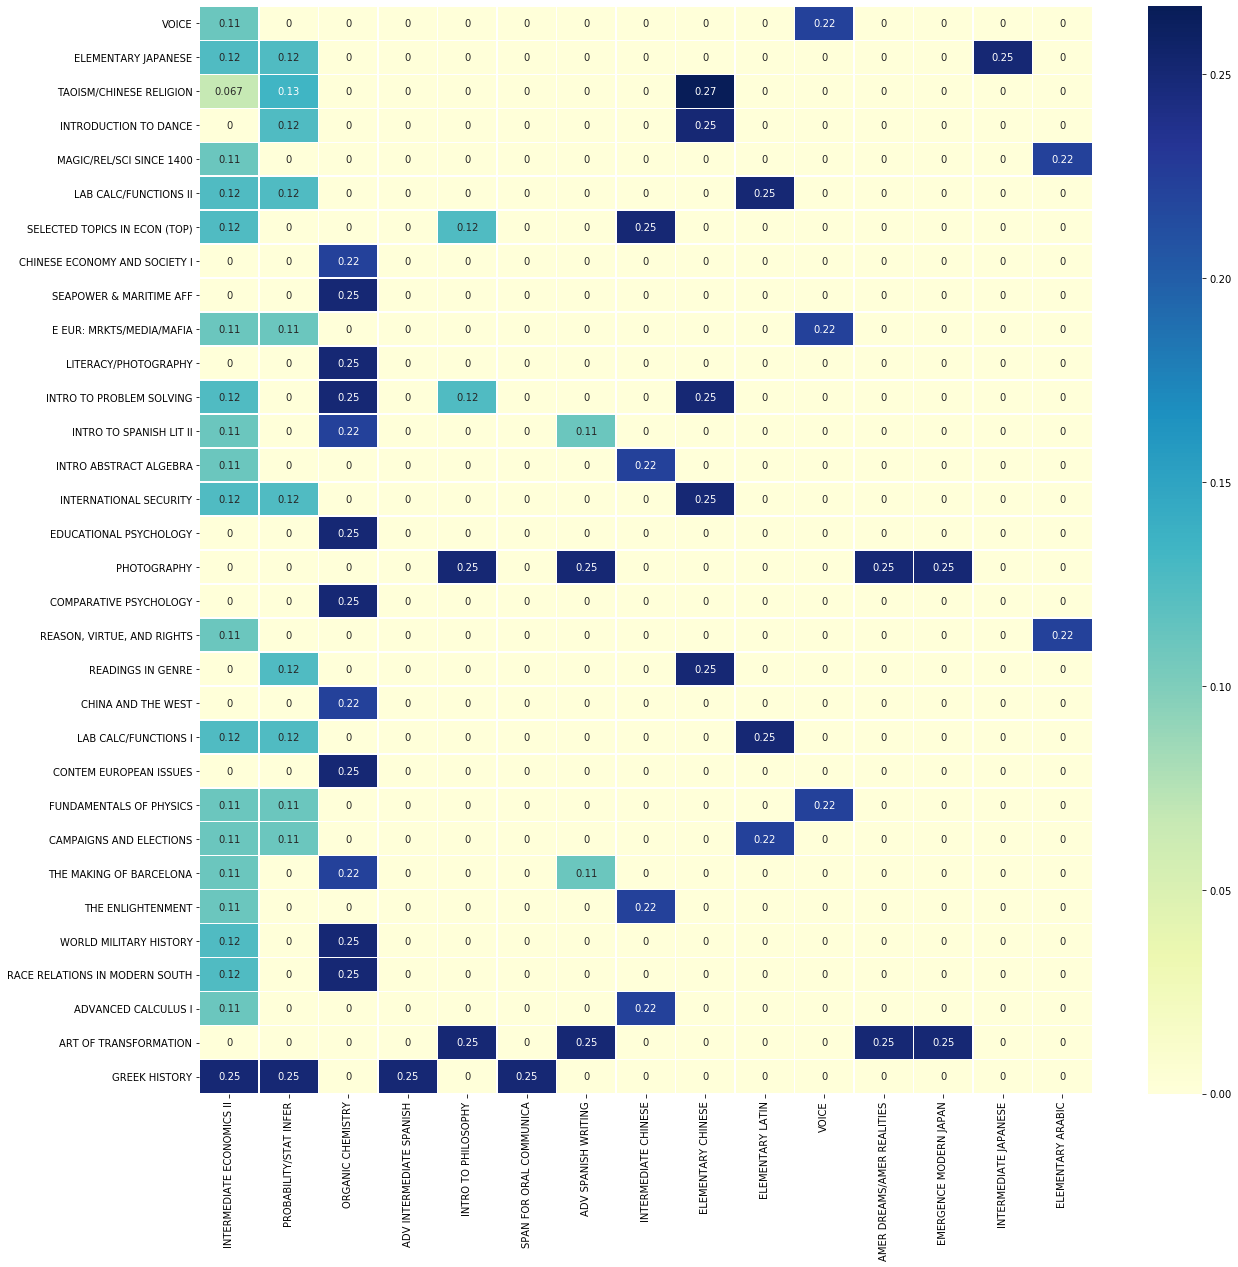

In [31]:
# given threshold, choose the maximum number more than 0.2 in column(the next year classes)
exmax = ex[ex.columns[ex.max() > 0.2]]
plt.rcParams['figure.figsize'] = (20.0, 20.0)

sns.heatmap(exmax, annot = True,cmap="YlGnBu", linewidths=.5)

In [27]:
row_sum

,0
ACADEMIC WRITING,1225
ECONOMIC PRINCIPLES,801
INTERMEDIATE CALCULUS,653
INTERMEDIATE ECONOMICS I,609
FIRST-YEAR SEMINAR (TOP),525
...,...
GENERAL MICROBIOLOGY,8
EDUCATIONAL PSYCHOLOGY,8
SHAKESPEARE AFTER 1600,8
READINGS IN GENRE,8


In [28]:
row_sum.loc[exmax.index]

,0
TAOISM/CHINESE RELIGION,15
ELEMENTARY JAPANESE,16
VOICE,18
E EUR: MRKTS/MEDIA/MAFIA,9
LITERACY/PHOTOGRAPHY,8
COMPARATIVE PSYCHOLOGY,8
CHINA AND THE WEST,9
LAB CALC/FUNCTIONS I,8
WORLD MILITARY HISTORY,8
MAGIC/REL/SCI SINCE 1400,9


# Top 10 courses

In [23]:
# get the top 10 classes in the first year
data_1['Descr'].value_counts(10).nlargest(10)

ACADEMIC WRITING             0.122990
ECONOMIC PRINCIPLES          0.079582
INTERMEDIATE CALCULUS        0.065113
INTERMEDIATE ECONOMICS I     0.061093
FIRST-YEAR SEMINAR (TOP)     0.053859
GENERAL CHEMISTRY            0.040997
PROBABILITY/STAT INFER       0.020900
INTERMEDIATE ECONOMICS II    0.016077
ONE VARIABLE CALCULUS        0.015273
LABORATORY CALCULUS II       0.014469
Name: Descr, dtype: float64

In [24]:
# set the index as top 10 classes in each year
row_1 = data_1['Descr'].value_counts(10).nlargest(10).index
row_2 = data_2['Descr'].value_counts(10).nlargest(10).index
row_3 = data_3['Descr'].value_counts(10).nlargest(10).index
row_4 = data_4['Descr'].value_counts(10).nlargest(10).index

In [25]:
row_3

Index(['INTRO TO ECONOMETRICS', 'SELECTED TOPICS',
       'FINANCIAL MRKTS & INVESTMENT', 'INTERMEDIATE ECONOMICS III',
       'ASSET PRICING & RISK MGMT', 'SELECTED TOPICS IN ECON (TOP)',
       'ORGANIZATIONS & MANAGEMENT', 'MARKETS & MANAGEMENT CAPSTONE',
       'CORPORATE FINANCE', 'MANAGERIAL FINANCE'],
      dtype='object')

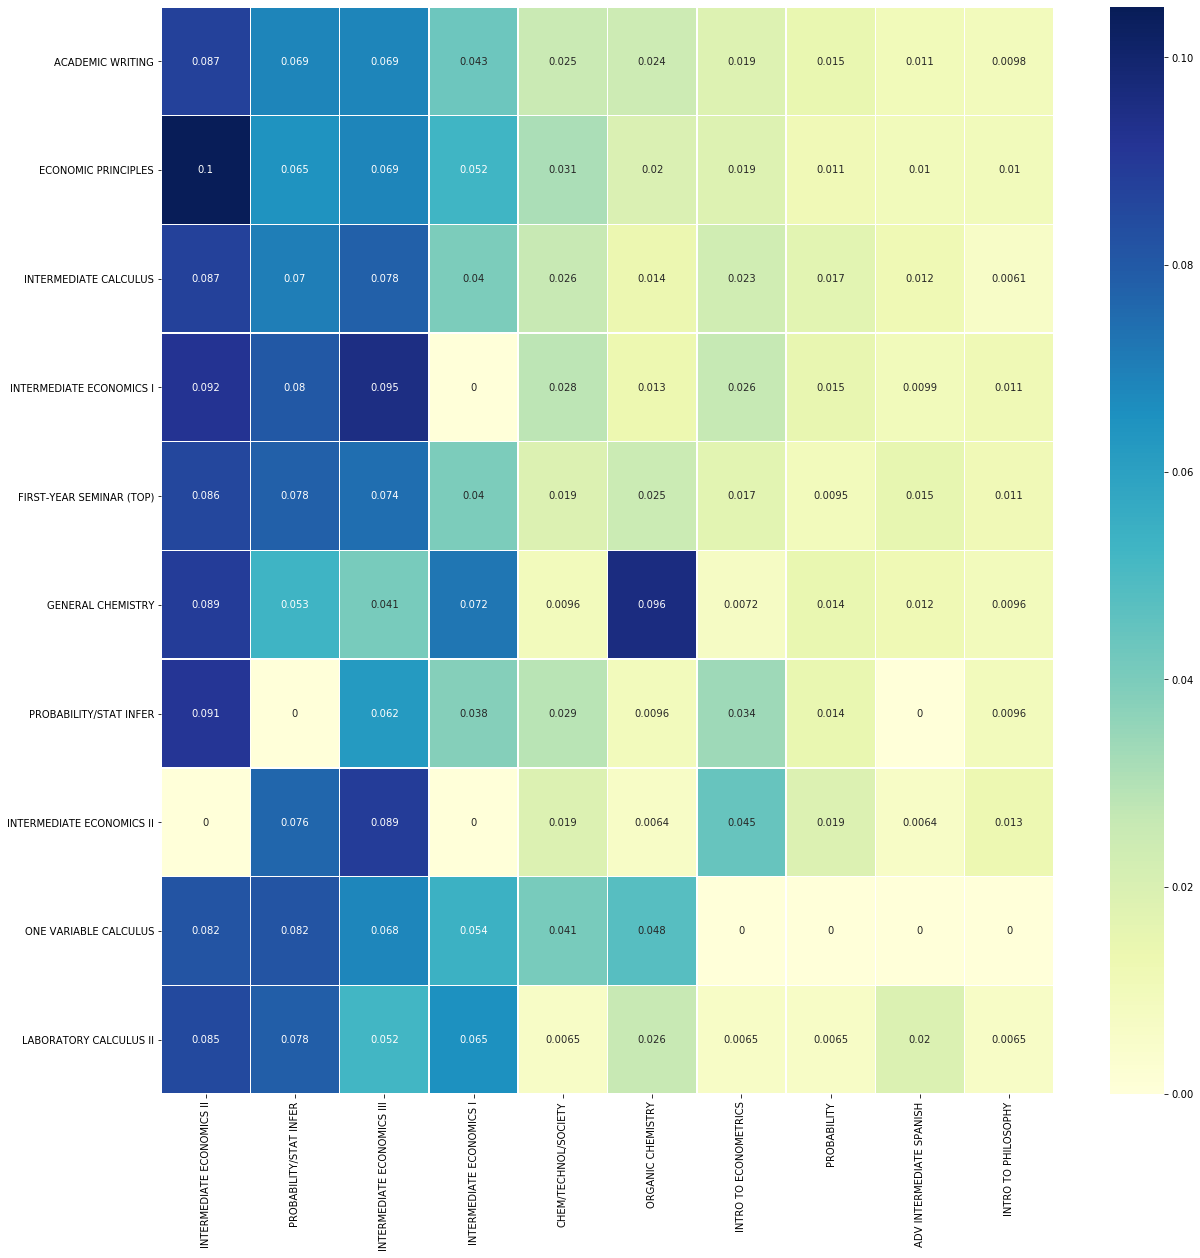

In [26]:
# Create a matrix from first year to second year with top 10 classes

top10 = transt1_2mc.loc[row_1][row_2]
plt.rcParams['figure.figsize'] = (20.0, 20.0)

sns.heatmap(top10, annot = True,cmap="YlGnBu", linewidths=.5)

In [29]:
top10r = top10.reset_index()

In [30]:
top10_m = pd.melt(top10r, 
            id_vars='index', 
            value_vars=list(top10r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
top10_m

,index,post_class,prob
0,ACADEMIC WRITING,INTERMEDIATE ECONOMICS II,0.087347
1,ECONOMIC PRINCIPLES,INTERMEDIATE ECONOMICS II,0.104869
2,INTERMEDIATE CALCULUS,INTERMEDIATE ECONOMICS II,0.087289
3,INTERMEDIATE ECONOMICS I,INTERMEDIATE ECONOMICS II,0.091954
4,FIRST-YEAR SEMINAR (TOP),INTERMEDIATE ECONOMICS II,0.085714
...,...,...,...
95,GENERAL CHEMISTRY,INTRO TO PHILOSOPHY,0.009615
96,PROBABILITY/STAT INFER,INTRO TO PHILOSOPHY,0.009615
97,INTERMEDIATE ECONOMICS II,INTRO TO PHILOSOPHY,0.012739
98,ONE VARIABLE CALCULUS,INTRO TO PHILOSOPHY,0.000000


In [31]:
# top10_m.to_csv('/Users/josephlee/registrar-recommender/03_intermediate/Mobility Matrix/top10_1to2.csv', index = False)
top10_mn = top10_m[['index','post_class']]
# top10_mn.to_csv('/Users/josephlee/registrar-recommender/03_intermediate/Mobility Matrix/top10_1to2_noprob.csv', index = False)
top10_mn

,index,post_class
0,ACADEMIC WRITING,INTERMEDIATE ECONOMICS II
1,ECONOMIC PRINCIPLES,INTERMEDIATE ECONOMICS II
2,INTERMEDIATE CALCULUS,INTERMEDIATE ECONOMICS II
3,INTERMEDIATE ECONOMICS I,INTERMEDIATE ECONOMICS II
4,FIRST-YEAR SEMINAR (TOP),INTERMEDIATE ECONOMICS II
...,...,...
95,GENERAL CHEMISTRY,INTRO TO PHILOSOPHY
96,PROBABILITY/STAT INFER,INTRO TO PHILOSOPHY
97,INTERMEDIATE ECONOMICS II,INTRO TO PHILOSOPHY
98,ONE VARIABLE CALCULUS,INTRO TO PHILOSOPHY


In [61]:
transt1_2mc_r = transt1_2mc.reset_index()
transt1_2mc_m = pd.melt(transt1_2mc_r, 
            id_vars='index', 
            value_vars=list(transt1_2mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans1_2 = transt1_2mc_m[transt1_2mc_m['prob']>0.1]

In [65]:
transt2_3mc_r = transt2_3mc.reset_index()
transt2_3mc_m = pd.melt(transt2_3mc_r, 
            id_vars='index', 
            value_vars=list(transt2_3mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans2_3 = transt2_3mc_m[transt2_3mc_m['prob']>0.1]

In [67]:
transt3_4mc_r = transt3_4mc.reset_index()
transt3_4mc_m = pd.melt(transt3_4mc_r, 
            id_vars='index', 
            value_vars=list(transt3_4mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans3_4 = transt3_4mc_m[transt3_4mc_m['prob']>0.1]

In [85]:
transt1_2

,16TH CENTURY ITALIAN ART,ABNORMAL PSYCHOLOGY,ACADEMIC WRITING,ACCEL GENERAL CHEMISTRY,ACOUSTICS AND MUSIC,ACTING REALISM,ADAPTIVE LEADERSHIP,ADV FIN & MGRL ACCOUNTING,ADV FR LANG/WRIT WORKSHP,ADV INTERMED FR LANG/CUL,...,URBAN ECONOMICS,US COMPARATIVE STATE POLITICS,VIKINGS/THEIR LITERATURE,VOCAL DIC,VOICE,WAR AND PEACE,"WAVES, BEACHES, COASTLINE DYNA",WEB-BASED MULTIMEDIA COMM.,WESTERN WARFARE SINCE 1789,WOMEN IN THE ECONOMY
20 C AMERICAN POL THEORY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABNORMAL PSYCHOLOGY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACADEMIC WRITING,2,2,0,2,2,1,1,1,1,3,...,2,1,1,1,4,1,1,1,1,2
ACCEL GENERAL CHEMISTRY,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
ACTING FOR THE CAMERA,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VISUAL RESEARCH/AMERICAN DREAM,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VOICE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,4,0,0,0,0,0
WORLD MILITARY HISTORY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WORLD OF THE GREEK THEATER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
trans1_2.to_csv('total_class1to2.csv')
trans2_3.to_csv('total_class2to3.csv')
trans3_4.to_csv('total_class3to4.csv')

In [69]:
concatrans = pd.concat([trans1_2,trans2_3,trans3_4])

In [75]:
concatrans.to_csv('concatrans_econ.csv')

In [84]:
trans1_2

,index,post_class,prob
1,ECONOMIC PRINCIPLES,INTERMEDIATE ECONOMICS II,0.104869
14,INTERMEDIATE SPANISH,INTERMEDIATE ECONOMICS II,0.111111
30,ELEMENTARY SPANISH 2,INTERMEDIATE ECONOMICS II,0.122807
34,LITERACY IN CHINESE,INTERMEDIATE ECONOMICS II,0.120000
41,INTERNATIONAL RELATIONS,INTERMEDIATE ECONOMICS II,0.119048
...,...,...,...
75596,JAZZ DANCE II,THE ART MARKET,0.111111
76032,READINGS IN GENRE,ADVERTISING/SOCIETY:GLOBAL,0.125000
76034,INTRODUCTION TO DANCE,ADVERTISING/SOCIETY:GLOBAL,0.125000
76544,ADV GERMAN I: CULTURE/SOCIETY,ADV SPECIAL TOPICS IN MUSIC,0.111111


In [32]:
from pajek_tools import PajekWriter
writer = PajekWriter(top10_mn,
                     directed=True,
                     citing_colname="index",
                     cited_colname="post_class")

/Users/josephlee/anaconda3/lib/python3.7/site-packages/pajek_tools/pajek_tools.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_edgelist[citing_colname] = self.df_edgelist[citing_colname].astype(self.dtype)
/Users/josephlee/anaconda3/lib/python3.7/site-packages/pajek_tools/pajek_tools.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_edgelist[cited_colname] = self.df_edgelist[cited_colname].astype(self.dtype)


In [44]:
import networkx as nx
G = nx.Graph()
nx.write_pajek(G, "output.net")
nx.shell_layout(G) 

{}

In [37]:
top10_m['index'].unique()

array(['ACADEMIC WRITING', 'ECONOMIC PRINCIPLES', 'INTERMEDIATE CALCULUS',
       'INTERMEDIATE ECONOMICS I', 'FIRST-YEAR SEMINAR (TOP)',
       'GENERAL CHEMISTRY', 'PROBABILITY/STAT INFER',
       'INTERMEDIATE ECONOMICS II', 'ONE VARIABLE CALCULUS',
       'INTRO BIOLOGICAL ANTHRO'], dtype=object)

In [38]:
top10_m.to_csv('a.csv')

In [39]:
# top10_m.to_csv('~/regisrar-recommender/00_data/2013-2020/top10_yr12.csv', index = False)

In [40]:
import networkx as nx
G=nx.from_pandas_edgelist(top10_m, 'index', 'post_class', ['prob'],create_using=nx.DiGraph())

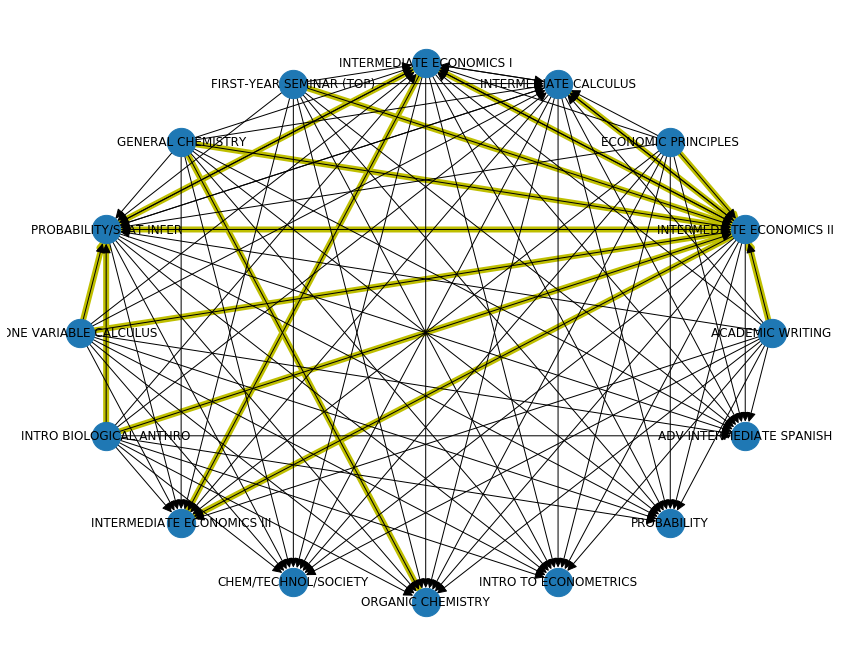

In [41]:
plt.figure(figsize=(15, 12))
pos = nx.shell_layout(G) 
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["prob"] > 0.08]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["prob"] <= 0.08]

nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=0.01, alpha=0.5, style="dashed"
)
nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color="y", width=6)

nx.draw(G, pos, with_labels=True, edge_attr=True,node_size=800, arrowsize=20)

In [42]:
G.nodes(data=True)

NodeDataView({'ACADEMIC WRITING': {}, 'INTERMEDIATE ECONOMICS II': {}, 'ECONOMIC PRINCIPLES': {}, 'INTERMEDIATE CALCULUS': {}, 'INTERMEDIATE ECONOMICS I': {}, 'FIRST-YEAR SEMINAR (TOP)': {}, 'GENERAL CHEMISTRY': {}, 'PROBABILITY/STAT INFER': {}, 'ONE VARIABLE CALCULUS': {}, 'INTRO BIOLOGICAL ANTHRO': {}, 'INTERMEDIATE ECONOMICS III': {}, 'CHEM/TECHNOL/SOCIETY': {}, 'ORGANIC CHEMISTRY': {}, 'INTRO TO ECONOMETRICS': {}, 'PROBABILITY': {}, 'ADV INTERMEDIATE SPANISH': {}})

# 2-3 year

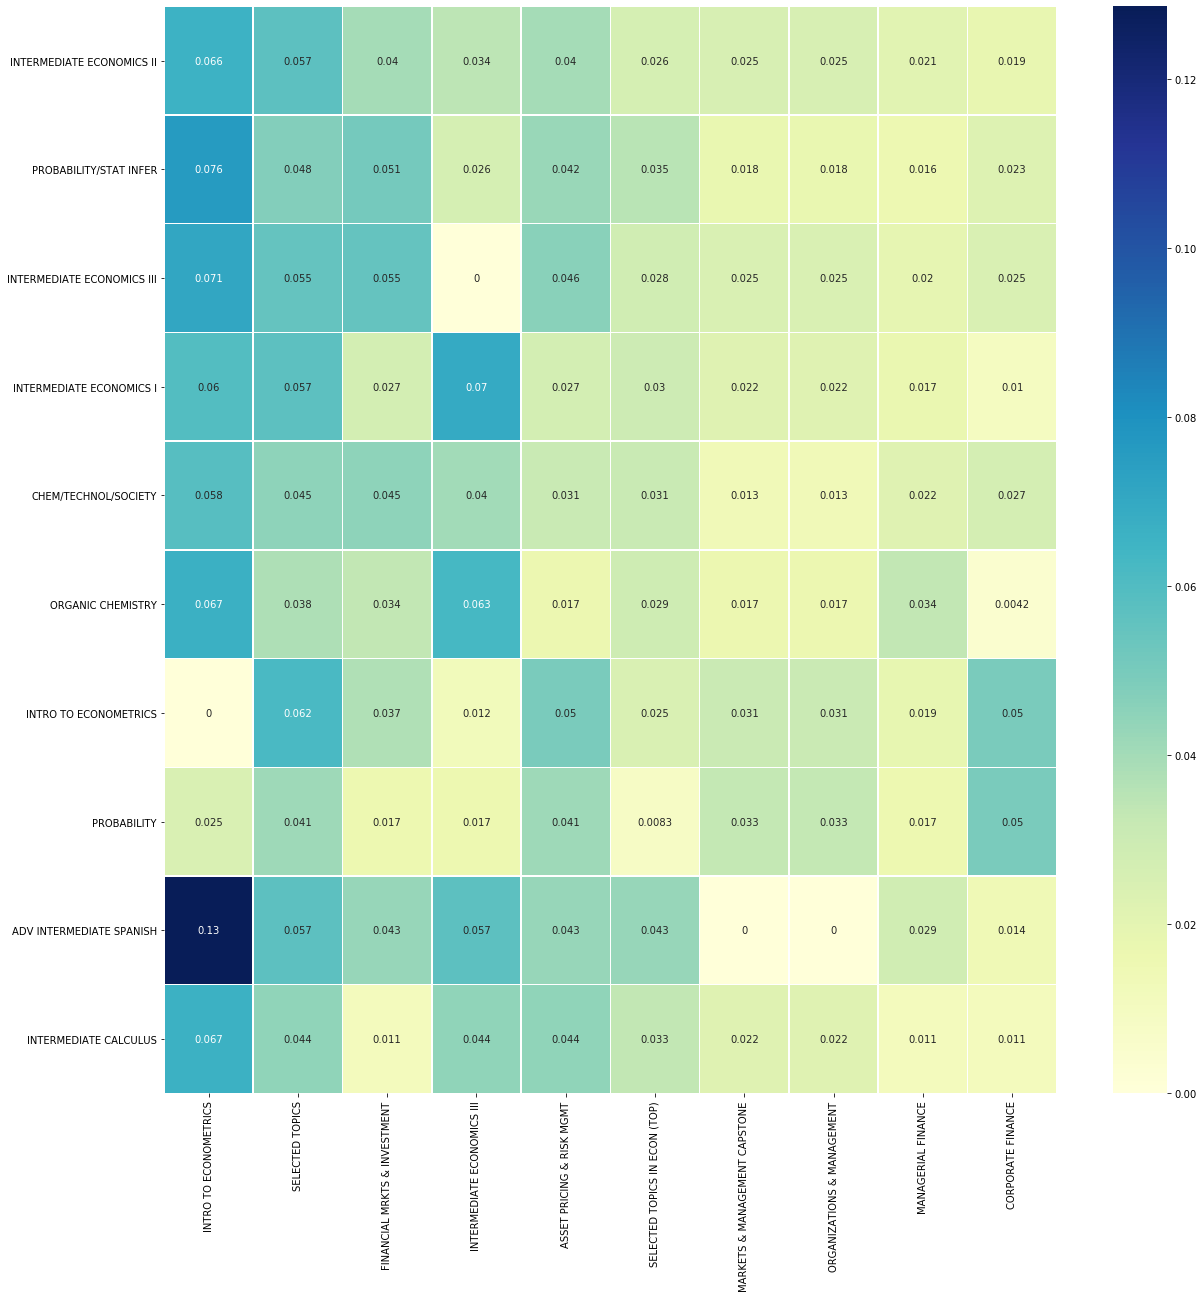

In [43]:

top10_2 = transt2_3mc.loc[row_2][row_3]
plt.rcParams['figure.figsize'] = (20.0, 20.0)

sns.heatmap(top10_2, annot = True,cmap="YlGnBu", linewidths=.5)

In [44]:
top10_2_list1 = top10_2.index.to_list()
top10_2_list2 = top10_2.columns.to_list()
top10r_2 = top10_2.reset_index()
top10_m_2 = pd.melt(top10r_2, 
            id_vars='index', 
            value_vars=list(top10r_2.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
top10_m_2

,index,post_class,prob
0,INTERMEDIATE ECONOMICS II,INTRO TO ECONOMETRICS,0.066138
1,PROBABILITY/STAT INFER,INTRO TO ECONOMETRICS,0.075838
2,INTERMEDIATE ECONOMICS III,INTRO TO ECONOMETRICS,0.070922
3,INTERMEDIATE ECONOMICS I,INTRO TO ECONOMETRICS,0.059701
4,CHEM/TECHNOL/SOCIETY,INTRO TO ECONOMETRICS,0.058296
...,...,...,...
95,ORGANIC CHEMISTRY,CORPORATE FINANCE,0.004202
96,INTRO TO ECONOMETRICS,CORPORATE FINANCE,0.049689
97,PROBABILITY,CORPORATE FINANCE,0.049587
98,ADV INTERMEDIATE SPANISH,CORPORATE FINANCE,0.014286


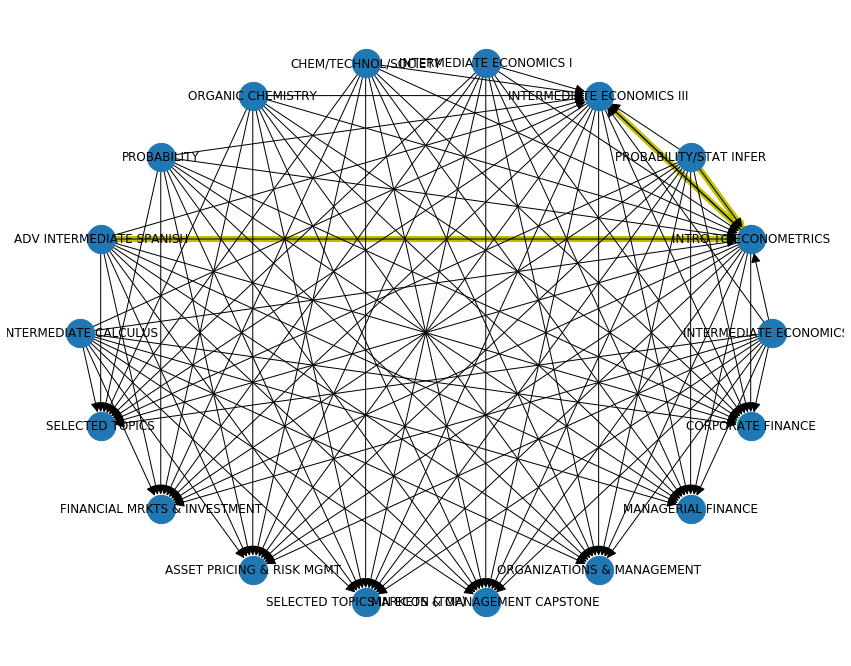

In [45]:
G_2=nx.from_pandas_edgelist(top10_m_2, 'index', 'post_class', ['prob'],create_using=nx.DiGraph())
plt.figure(figsize=(15, 12))
pos_2 = nx.shell_layout(G_2) 
elarge_2 = [(u, v) for (u, v, d) in G_2.edges(data=True) if d["prob"] > 0.07]
esmall_2 = [(u, v) for (u, v, d) in G_2.edges(data=True) if d["prob"] <= 0.07]


nx.draw_networkx_edges(
    G_2, pos_2, edgelist=esmall_2, width=0.01, alpha=0.5, style="dashed"
)
nx.draw_networkx_edges(G_2, pos_2, edgelist=elarge_2, edge_color="y", width=6)
nx.draw(G_2, pos_2, with_labels=True, edge_attr=True,node_size=800, arrowsize=20)

# 3-4 year

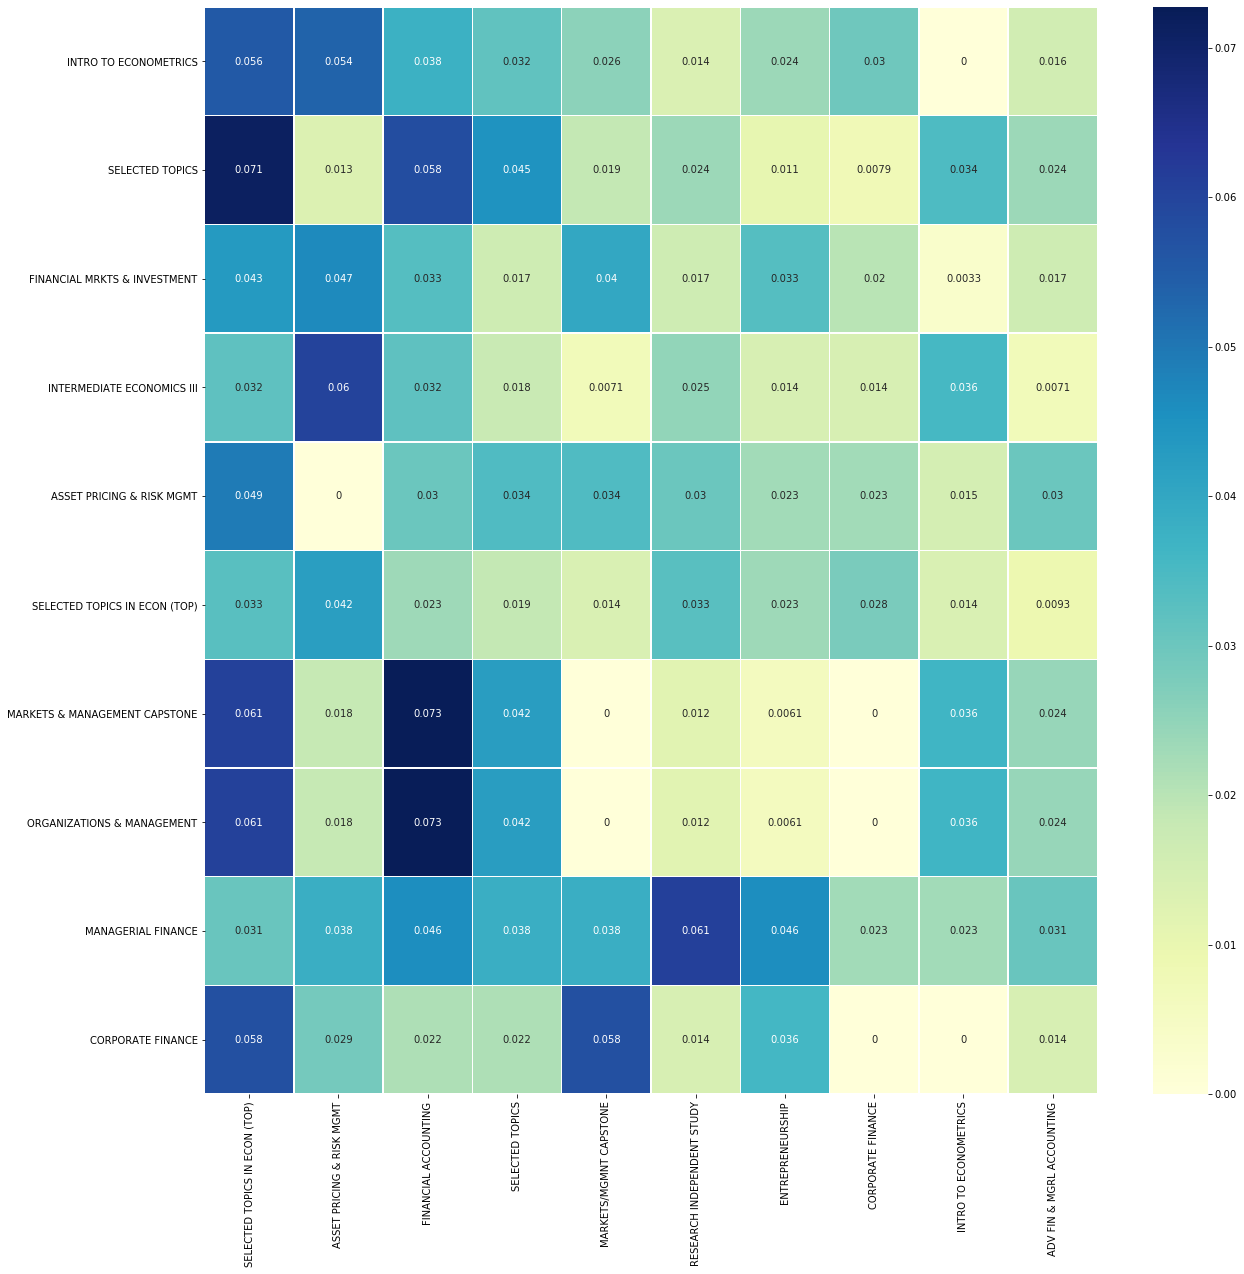

In [46]:
top10_3 = transt3_4mc.loc[row_3][row_4]
plt.rcParams['figure.figsize'] = (20.0, 20.0)

sns.heatmap(top10_3, annot = True,cmap="YlGnBu", linewidths=.5)

In [47]:
top10_3_list1 = top10_3.index.to_list()
top10_3_list2 = top10_3.columns.to_list()
top10r_3 = top10_3.reset_index()
top10_m_3 = pd.melt(top10r_3, 
            id_vars='index', 
            value_vars=list(top10r_3.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
top10_m_3

,index,post_class,prob
0,INTRO TO ECONOMETRICS,SELECTED TOPICS IN ECON (TOP),0.055666
1,SELECTED TOPICS,SELECTED TOPICS IN ECON (TOP),0.071429
2,FINANCIAL MRKTS & INVESTMENT,SELECTED TOPICS IN ECON (TOP),0.043333
3,INTERMEDIATE ECONOMICS III,SELECTED TOPICS IN ECON (TOP),0.032028
4,ASSET PRICING & RISK MGMT,SELECTED TOPICS IN ECON (TOP),0.049242
...,...,...,...
95,SELECTED TOPICS IN ECON (TOP),ADV FIN & MGRL ACCOUNTING,0.009346
96,MARKETS & MANAGEMENT CAPSTONE,ADV FIN & MGRL ACCOUNTING,0.024242
97,ORGANIZATIONS & MANAGEMENT,ADV FIN & MGRL ACCOUNTING,0.024242
98,MANAGERIAL FINANCE,ADV FIN & MGRL ACCOUNTING,0.030534


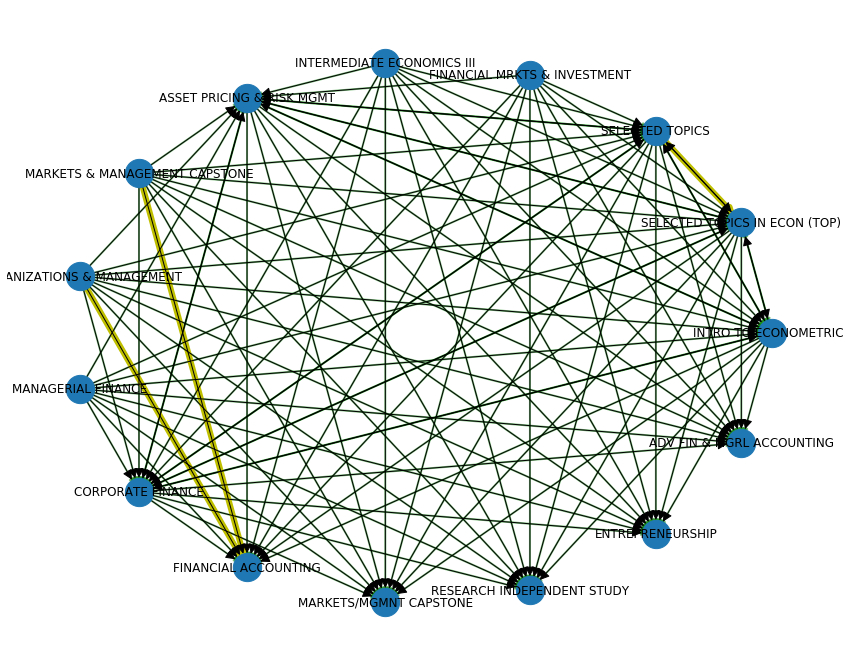

In [48]:
G_3=nx.from_pandas_edgelist(top10_m_3, 'index', 'post_class', ['prob'],create_using=nx.DiGraph())
plt.figure(figsize=(15, 12))
pos_3 = nx.shell_layout(G_3) 
elarge_3 = [(u, v) for (u, v, d) in G_3.edges(data=True) if d["prob"] > 0.07]
esmall_3 = [(u, v) for (u, v, d) in G_3.edges(data=True) if d["prob"] <= 0.07]


nx.draw_networkx_edges(
    G_3, pos_3, edgelist=esmall_3, width=2, alpha=0.5, edge_color="g"
)
nx.draw_networkx_edges(G_3, pos_3, edgelist=elarge_3, edge_color="y", width=6)
nx.draw(G_3, pos_3, with_labels=True, edge_attr=True,node_size=800, arrowsize=20)